## Capstone - NYC Tree Census - Statistical Analysis 

### Table of contents
1. [Getting Data](#Getting-Data)
     -   1.1 [Loading Data](#Loading-Data)
     
     
2. [Distribution of tree diameter](#Distribution-of-tree-diameter)
     -   2.1 [Distribution of diameter by Health](#Distribution-of-diameter-by-health)
     -   2.2 [Emprical Cumulative Distribution Function(ECDF) for diameter](#ECDF-for-diameter)
     
     
3. [Distribution of tree problem count](#Distribution-of-tree-problem-count)
     -   2.1 [Distribution of problem count by Health](#Distribution-of-diameter-by-health)
     -   2.2 [Emprical Cumulative Distribution Function(ECDF) for problem count](#ECDF-for-problem-count)
         
         
4. [Chi test for Independence](#Chi-test-for-Independence)
     -   4.1 [Tree Loaction](#Tree-Location)
     -   4.2 [Presence and type of tree guards](#Presence-and-type-of-tree-guards)
     -   4.3 [Sidewalk damage adjcent to tree](#Sidewalk-damange-adjcent-to-tree)
     -   4.4 [Root problems caused by paving stones in the tree bed](#Root-problems-caused-by-paving-stones-in-the-tree-bed)
     -   4.5 [Root problems by metal grates](#Root-problems-by-metal-grates)
     -   4.6 [Presence of other root problems](#Presence-of-other-root-problems)
     -   4.7 [Trunk problems caused by ropes or wipes](#Trunk-problems-caused-by-ropes-or-wipes)
     -   4.8 [Trunk problems caused by light](#Trunk-problems-caused-by-lights)
     -   4.9 [Presence of other Trunk problems](#Presence-of-other-trunk-problems)
     -   4.10 [Branch problems caused by light or wire](#Branch-problems-caused-by-light-or-wire)
     -   4.11 [Branch problems caused by shoes](#Branch-problems-caused-by-shoes)
     -   4.12 [Presence of other branch problems](#Presence-of-other-branch-problems)
          
          
5. [Coorelation Matrix](#Correlation-Matrix)

### Getting Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

In [2]:
tree_data = pd.read_csv('clean_trees.csv')

In [3]:
tree_data.shape

(642741, 30)

In [83]:
tree_data.columns

Index(['Unnamed: 0', 'tree_id', 'block_id', 'created_at', 'tree_dbh',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'borough', 'latitude',
       'longitude', 'x_sp', 'y_sp', 'problem_count'],
      dtype='object')

### 3. Distribution of trees diameter

array([[<AxesSubplot:title={'center':'tree_dbh'}>]], dtype=object)

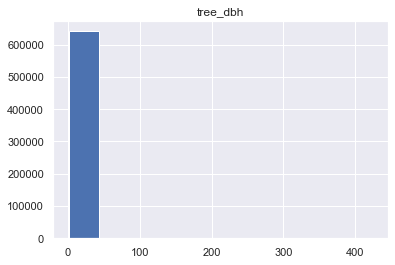

In [4]:
tree_data.hist(column='tree_dbh')

In [5]:
tree_data['tree_dbh'].describe()

count    642741.000000
mean         11.725564
std           8.640623
min           1.000000
25%           5.000000
50%          10.000000
75%          16.000000
max         425.000000
Name: tree_dbh, dtype: float64

In [6]:
tree_50 = tree_data[tree_data.tree_dbh > 50]
tree_50.shape

(353, 30)

In [7]:
#drop indexes for which column tree diameter value is greater than 50
tree_data.drop(tree_data[tree_data['tree_dbh'] > 50].index, inplace = True)

In [8]:
tree_data.shape

(642388, 30)

*Successfully removed 353 rows for trees with diameter greater then 50 inches*

#### 2.1 Diameter Distribution by Health of tree

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

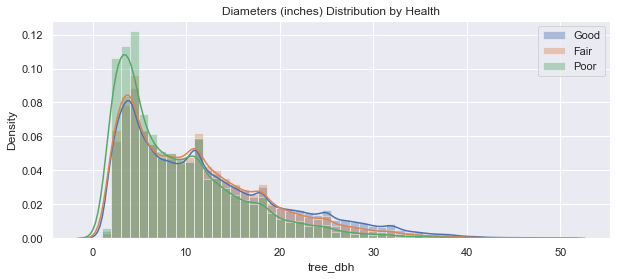

In [9]:
# group diameters according to tree health
poor = tree_data[tree_data.health == 'Poor']['tree_dbh']
fair = tree_data[tree_data.health =='Fair']['tree_dbh']
good = tree_data[tree_data.health == 'Good']['tree_dbh']

# plotting the distribution of diameters
plt.figure(figsize=(10, 4))
sns.distplot(good, label='Good')
sns.distplot(fair, label='Fair')
sns.distplot(poor, label='Poor')
plt.title('Diameters (inches) Distribution by Health')
plt.legend()
plt.show()

#### 2.2 Plotting ECDF for Diameter

In [10]:
# ECDF function 
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

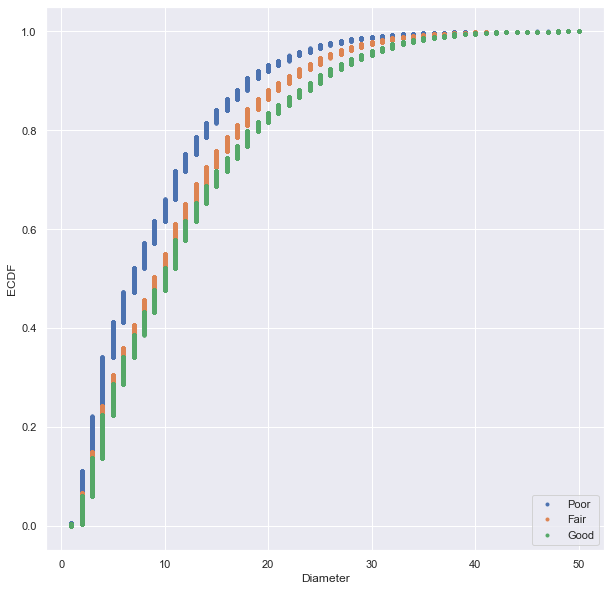

In [11]:
# Compute ECDFs
x_poor, y_poor = ecdf(poor)
x_fair, y_fair = ecdf(fair)
x_good, y_good = ecdf(good)

# Plot all ECDFs on the same plot
plt.figure(figsize=(10, 10))
plt.plot(x_poor, y_poor, marker='.', linestyle='none')
plt.plot(x_fair, y_fair, marker='.', linestyle='none')
plt.plot(x_good, y_good, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('Poor', 'Fair', 'Good'), loc='lower right')
plt.xlabel('Diameter')
plt.ylabel('ECDF')


# Display the plot
plt.show()

*The trees with poor helath seems to have smaller diameter when compared to fair and healthy trees.*

### 3. Distribution of Problem counts

array([[<AxesSubplot:title={'center':'problem_count'}>]], dtype=object)

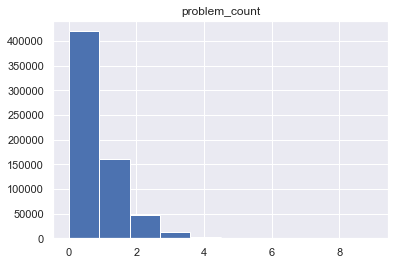

In [12]:
tree_data.hist(column='problem_count')

In [13]:
tree_p5 = tree_data[tree_data.problem_count > 4]
tree_p5.shape

(297, 30)

#### 3.1 Distribution of problem counts by health

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

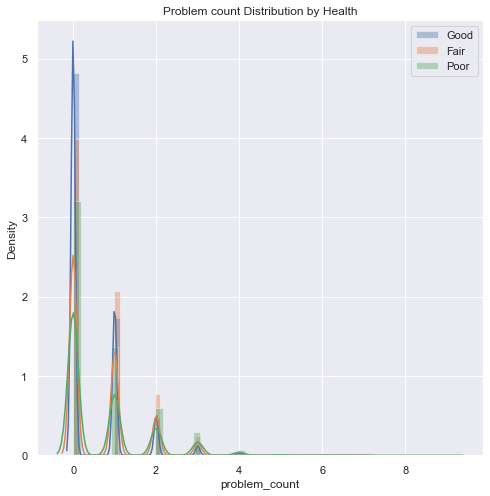

In [14]:
# group problem_count according to tree health
poor_p = tree_data[tree_data.health == 'Poor']['problem_count']
fair_p = tree_data[tree_data.health =='Fair']['problem_count']
good_p = tree_data[tree_data.health == 'Good']['problem_count']

# plotting the distribution of diameters
plt.figure(figsize=(8, 8))
sns.distplot(good_p, label='Good')
sns.distplot(fair_p, label='Fair')
sns.distplot(poor_p, label='Poor')
plt.title('Problem count Distribution by Health')
plt.legend()
plt.show()

#### 3.2 Plotting ECDF for problem counts 

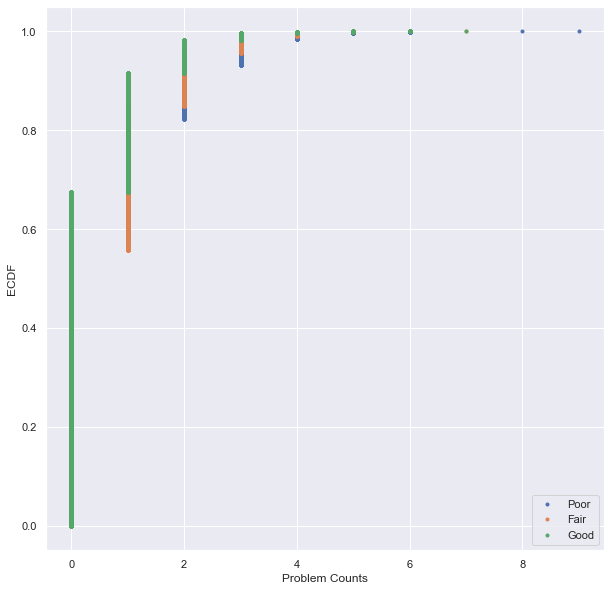

In [15]:
# Compute ECDFs
x_poor, y_poor = ecdf(poor_p)
x_fair, y_fair = ecdf(fair_p)
x_good, y_good = ecdf(good_p)

# Plot all ECDFs on the same plot
plt.figure(figsize=(10, 10))
plt.plot(x_poor, y_poor, marker='.', linestyle='none')
plt.plot(x_fair, y_fair, marker='.', linestyle='none')
plt.plot(x_good, y_good, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('Poor', 'Fair', 'Good'), loc='lower right')
plt.xlabel('Problem Counts')
plt.ylabel('ECDF')


# Display the plot
plt.show()

- More than 65% of healthy trees have no problems   
- Roughly, 25% of health trees have one problem
- Less than of healthy trees have more than one problem
- Unhealthy trees (Poor) have two or more problems

### 4. Chi Test for Independence 

#### 4.1 Tree Location  

In [16]:
curb_df = pd.pivot_table(tree_data, values='tree_id', index=['curb_loc'],
               columns=['health'], aggfunc='count', fill_value=0)

In [17]:
curb_df

health,Fair,Good,Poor
curb_loc,,,
OffsetFromCurb,3884,20208,912
OnCurb,90990,500997,25397


In [18]:
curb_chi = chi2_contingency(curb_df)
curb_chi

(23.372936220877648,
 8.406812991494818e-06,
 2,
 array([[  3692.82971662,  20287.1314844 ,   1024.03879898],
        [ 91181.17028338, 500917.8685156 ,  25284.96120102]]))

In [19]:
print(f"chisquare:", curb_chi[0])
print(f"p-value:", curb_chi[1])
print(f"degree of freedom:", curb_chi[2])

chisquare: 23.372936220877648
p-value: 8.406812991494818e-06
degree of freedom: 2


- The p-value is 8.404771579987583e-06 and significantly above the commonly accepted level of significance of 0.05. 
- Null hypothesis is not rejected (**H₀: there is no relationship between curb_loc and health of tree**)

#### 4.2 Presence and type of tree guard  

In [20]:
guards_df = pd.pivot_table(tree_data, values='tree_id', index=['guards'],
               columns=['health'], aggfunc='count', fill_value=0)

In [21]:
guards_df

health,Fair,Good,Poor
guards,,,
Harmful,3788,15101,1082
Helpful,7037,41975,2020
None,82697,458286,22753
Unsure,1352,5843,454


In [22]:
guards_chi = chi2_contingency(guards_df)
guards_chi

(580.6148477155668,
 3.538066490428584e-122,
 6,
 array([[2.94950817e+03, 1.62035795e+04, 8.17912288e+02],
        [7.53689354e+03, 4.14050909e+04, 2.09001552e+03],
        [8.32579209e+04, 4.57390272e+05, 2.30878074e+04],
        [1.12967743e+03, 6.20605778e+03, 3.13264789e+02]]))

- The p-value is 2.8478701151508146e-122 and significantly above the commonly accepted level of significance of 0.05. 
- Null hypothesis is not rejected (**H₀: there is no relationship between presence of guard and health of tree**).

#### 4.3 Sidewalk damage immediately adjacent to tree

In [23]:
sidewalk_df = pd.pivot_table(tree_data, values='tree_id', index=['sidewalk'],
               columns=['health'], aggfunc='count', fill_value=0)

In [24]:
sidewalk_df

health,Fair,Good,Poor
sidewalk,,,
Damage,28323,150090,6499
NoDamage,66551,371115,19810


In [25]:
sidewalk_chi = chi2_contingency(sidewalk_df)
sidewalk_chi

(266.7484685283444,
 1.192081727322064e-58,
 2,
 array([[ 27309.57161093, 150029.35758451,   7573.07080456],
        [ 67564.42838907, 371175.64241549,  18735.92919544]]))

- The p-value is 1.538880405203704e-58 and significantly above the commonly accepted level of significance of 0.05. 
- Null hypothesis is not rejected (**H₀: there is no relationship between presence of sidewalk damange immediately adjacent to tree and health of tree**).

#### 4.4 Root problems caused by paving stones in the tree bed

In [26]:
rootstone_df = pd.pivot_table(tree_data, values='tree_id', index=['root_stone'],
               columns=['health'], aggfunc='count', fill_value=0)

In [27]:
rootstone_df

health,Fair,Good,Poor
root_stone,,,
No,71670,411315,21231
Yes,23204,109890,5078


In [28]:
rootstone_chi = chi2_contingency(rootstone_df)

rootstone_chi

(620.3686599773328,
 1.9438247747491203e-135,
 2,
 array([[ 74467.43834567, 409098.39579818,  20650.16585615],
        [ 20406.56165433, 112106.60420182,   5658.83414385]]))

- The p-value is  1.4674129620205588e-135 and significantly above the commonly accepted level of significance of 0.05. 
- Null hypothesis is not rejected (**H₀: there is no relationship between root problems caused by paving stones in the tree bed and health of tree**).

#### 4.5 Root problems caused by metal grates 

In [29]:
rootgrates_df = pd.pivot_table(tree_data, values='tree_id', index=['root_grate'],
               columns=['health'], aggfunc='count', fill_value=0)

In [30]:
rootgrates_df

health,Fair,Good,Poor
root_grate,,,
No,94057,518828,26062
Yes,817,2377,247


In [31]:
rootgrate_chi = chi2_contingency(rootgrates_df)
rootgrate_chi

(330.9018438232198,
 1.3982266903066897e-72,
 2,
 array([[9.43658002e+04, 5.18413126e+05, 2.61680738e+04],
        [5.08199770e+02, 2.79187408e+03, 1.40926152e+02]]))

- The p-value is 1.4509051433790172e-72 and significantly above the commonly accepted level of significance of 0.05. 
- Null hypothesis is not rejected (**H₀: there is no relationship between root problems caused by metal grates and health of tree**).

#### 4.6 Presence of other root problems 

In [32]:
rootother_df = pd.pivot_table(tree_data, values='tree_id', index=['root_other'],
               columns=['health'], aggfunc='count', fill_value=0)

In [33]:
rootother_df

health,Fair,Good,Poor
root_other,,,
No,88442,499749,24212
Yes,6432,21456,2097


In [34]:
rootother_chi = chi2_contingency(rootother_df)
rootother_chi

(1951.5727135651098,
 0.0,
 2,
 array([[ 90445.52859331, 496876.50705648,  25080.96435021],
        [  4428.47140669,  24328.49294352,   1228.03564979]]))

- The p-value is 0.0, and  below the commonly accepted level of significance of 0.05. 
- Null hypothesis is rejected (**H₀: there is relationship between presence of other root problems and health of tree**).

#### 4.7 Trunk problems caused by rope or wires

In [35]:
trunkrope_df = pd.pivot_table(tree_data, values='tree_id', index=['trunk_wire'],
               columns=['health'], aggfunc='count', fill_value=0)

In [36]:
trunkrope_df

health,Fair,Good,Poor
trunk_wire,,,
No,92135,511543,25564
Yes,2739,9662,745


In [37]:
trunkwire_chi = chi2_contingency(trunkrope_df)
trunkwire_chi

(511.83785263596087,
 7.175009583704032e-112,
 2,
 array([[ 92932.47306612, 510538.92135283,  25770.60558105],
        [  1941.52693388,  10666.07864717,    538.39441895]]))

- The p-value is  7.2365467766323455e-112, and significantly above the commonly accepted level of significance of 0.05. 
- Null hypothesis is not rejected (**H₀: there is no relationship between trunk problems caused by rope or wires and health of tree**).

#### 4.8 Trunk problems caused by lights 

In [38]:
trunklight_df = pd.pivot_table(tree_data, values='tree_id', index=['trnk_light'],
               columns=['health'], aggfunc='count', fill_value=0)

In [39]:
trunklight_df

health,Fair,Good,Poor
trnk_light,,,
No,94659,520458,26248
Yes,215,747,61


In [40]:
trunklight_chi = chi2_contingency(trunklight_df)
trunklight_chi

(44.12064983940591,
 2.6261686848388395e-10,
 2,
 array([[9.47229136e+04, 5.20374983e+05, 2.62671030e+04],
        [1.51086418e+02, 8.30016618e+02, 4.18969641e+01]]))

- The p-value is 2.6416113724590547e-10, and significantly above the commonly accepted level of significance of 0.05. 
- Null hypothesis is not rejected (**H₀: there is no relationship between trunk problems caused by lights and health of tree**).

#### 4.9 Presence of other trunk problems 

In [41]:
trunkother_df = pd.pivot_table(tree_data, values='tree_id', index=['trnk_other'],
               columns=['health'], aggfunc='count', fill_value=0)

In [42]:
trunkother_df

health,Fair,Good,Poor
trnk_other,,,
No,85614,502228,22455
Yes,9260,18977,3854


In [43]:
trunkother_chi = chi2_contingency(trunkother_df)
trunkother_chi

(11719.192647699883,
 0.0,
 2,
 array([[ 90134.49438346, 495167.79249457,  24994.71312198],
        [  4739.50561654,  26037.20750543,   1314.28687802]]))

- The p-value is 0.0, and significantly above the commonly accepted level of significance of 0.05. 
- Null hypothesis is rejected (**H₀: there is relationship between presence of other trunk problems and health of tree**).

#### 4.10 Branch problems caused by lights or wires

In [44]:
branchwire_df = pd.pivot_table(tree_data, values='tree_id', index=['brch_light'],
               columns=['health'], aggfunc='count', fill_value=0)

In [45]:
branchwire_df

health,Fair,Good,Poor
brch_light,,,
No,84073,472599,23967
Yes,10801,48606,2342


In [46]:
branchwire_chi = chi2_contingency(branchwire_df)
branchwire_chi

(407.53570943611317,
 3.1970181856612026e-89,
 2,
 array([[ 85754.31746234, 471104.61278075,  23780.06975691],
        [  9119.68253766,  50100.38721925,   2528.93024309]]))

- The p-value is 2.842277659959342e-89, and significantly above the commonly accepted level of significance of 0.05. 
- Null hypothesis is not rejected (**H₀: there is no relationship between presence of branch problems caused by lights  and health of tree**).

#### 4.11 Branch problems caused by shoes

In [47]:
branchshoe_df = pd.pivot_table(tree_data, values='tree_id', index=['brch_shoe'],
               columns=['health'], aggfunc='count', fill_value=0)

In [48]:
branchshoe_df

health,Fair,Good,Poor
brch_shoe,,,
No,94780,520923,26280
Yes,94,282,29


In [49]:
branchshoe_chi = chi2_contingency(branchshoe_df)
branchshoe_chi

(35.458635907975086,
 1.996434400966531e-08,
 2,
 array([[9.48141857e+04, 5.20876401e+05, 2.62924132e+04],
        [5.98142711e+01, 3.28598954e+02, 1.65867747e+01]]))

- The p-value is 4.396268332231969e-09, and significantly above the commonly accepted level of significance of 0.05. 
- Null hypothesis is not rejected (**H₀: there is no relationship between presence of branch problems caused by shoes  and health of tree**).

#### 4.12 Presence of other branch problems 

In [50]:
branchother_df = pd.pivot_table(tree_data, values='tree_id', index=['brch_other'],
               columns=['health'], aggfunc='count', fill_value=0)

In [51]:
branchother_df

health,Fair,Good,Poor
brch_other,,,
No,87105,508599,22718
Yes,7769,12606,3591


In [52]:
branchother_chi = chi2_contingency(branchother_df)
branchother_chi

(14954.638291726962,
 0.0,
 2,
 array([[ 91334.47204493, 501760.05546492,  25327.47249015],
        [  3539.52795507,  19444.94453508,    981.52750985]]))

- The p-value is 0.0, and below the commonly accepted level of significance of 0.05. 
- Null hypothesis is rejected (**H₀: there is relationship between presence of other branch problems and health of tree**).

### 5. Correlation Matrix 

In [53]:
tree_data.columns

Index(['Unnamed: 0', 'tree_id', 'block_id', 'created_at', 'tree_dbh',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'borough', 'latitude',
       'longitude', 'x_sp', 'y_sp', 'problem_count'],
      dtype='object')

#### 5.1 Unquie Values for all the features 

In [59]:
tree_data['curb_loc'].unique()

array(['OnCurb', 'OffsetFromCurb'], dtype=object)

In [60]:
tree_data['steward'].unique()

array(['None', '1or2', '3or4', '4orMore'], dtype=object)

In [61]:
tree_data['guards'].unique()

array(['None', 'Helpful', 'Harmful', 'Unsure'], dtype=object)

In [62]:
tree_data['sidewalk'].unique()

array(['NoDamage', 'Damage'], dtype=object)

In [63]:
tree_data['user_type'].unique()

array(['TreesCount Staff', 'Volunteer', 'NYC Parks Staff'], dtype=object)

In [64]:
tree_data['root_stone'].unique()

array(['No', 'Yes'], dtype=object)

In [65]:
tree_data['root_grate'].unique()

array(['No', 'Yes'], dtype=object)

In [66]:
tree_data['root_other'].unique()

array(['No', 'Yes'], dtype=object)

In [67]:
tree_data['trunk_wire'].unique()

array(['No', 'Yes'], dtype=object)

In [69]:
tree_data['trnk_light'].unique()

array(['No', 'Yes'], dtype=object)

In [71]:
tree_data['trnk_other'].unique()

array(['No', 'Yes'], dtype=object)

In [72]:
tree_data['brch_light'].unique()

array(['No', 'Yes'], dtype=object)

In [73]:
tree_data['brch_shoe'].unique()

array(['No', 'Yes'], dtype=object)

In [74]:
tree_data['brch_other'].unique()

array(['No', 'Yes'], dtype=object)

In [75]:
encoded_data = pd.get_dummies(tree_data, columns = ['curb_loc','steward',
       'guards', 'sidewalk','root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other'])

In [76]:
encoded_data.shape

(642388, 47)

In [77]:
encoded_data.columns

Index(['Unnamed: 0', 'tree_id', 'block_id', 'created_at', 'tree_dbh', 'status',
       'health', 'spc_latin', 'spc_common', 'user_type', 'problems', 'borough',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'problem_count',
       'curb_loc_OffsetFromCurb', 'curb_loc_OnCurb', 'steward_1or2',
       'steward_3or4', 'steward_4orMore', 'steward_None', 'guards_Harmful',
       'guards_Helpful', 'guards_None', 'guards_Unsure', 'sidewalk_Damage',
       'sidewalk_NoDamage', 'root_stone_No', 'root_stone_Yes', 'root_grate_No',
       'root_grate_Yes', 'root_other_No', 'root_other_Yes', 'trunk_wire_No',
       'trunk_wire_Yes', 'trnk_light_No', 'trnk_light_Yes', 'trnk_other_No',
       'trnk_other_Yes', 'brch_light_No', 'brch_light_Yes', 'brch_shoe_No',
       'brch_shoe_Yes', 'brch_other_No', 'brch_other_Yes'],
      dtype='object')

In [80]:
encoded_data = encoded_data.drop(['Unnamed: 0'], axis = 1)

In [85]:
# Getting data for correlation Matrix 
data = encoded_data[['problem_count','health',
       'curb_loc_OffsetFromCurb', 'curb_loc_OnCurb', 'steward_1or2',
       'steward_3or4', 'steward_4orMore', 'steward_None', 'guards_Harmful',
       'guards_Helpful', 'guards_None', 'guards_Unsure', 'sidewalk_Damage',
       'sidewalk_NoDamage', 'root_stone_No', 'root_stone_Yes', 'root_grate_No',
       'root_grate_Yes', 'root_other_No', 'root_other_Yes', 'trunk_wire_No',
       'trunk_wire_Yes', 'trnk_light_No', 'trnk_light_Yes', 'trnk_other_No',
       'trnk_other_Yes', 'brch_light_No', 'brch_light_Yes', 'brch_shoe_No',
       'brch_shoe_Yes', 'brch_other_No', 'brch_other_Yes']]

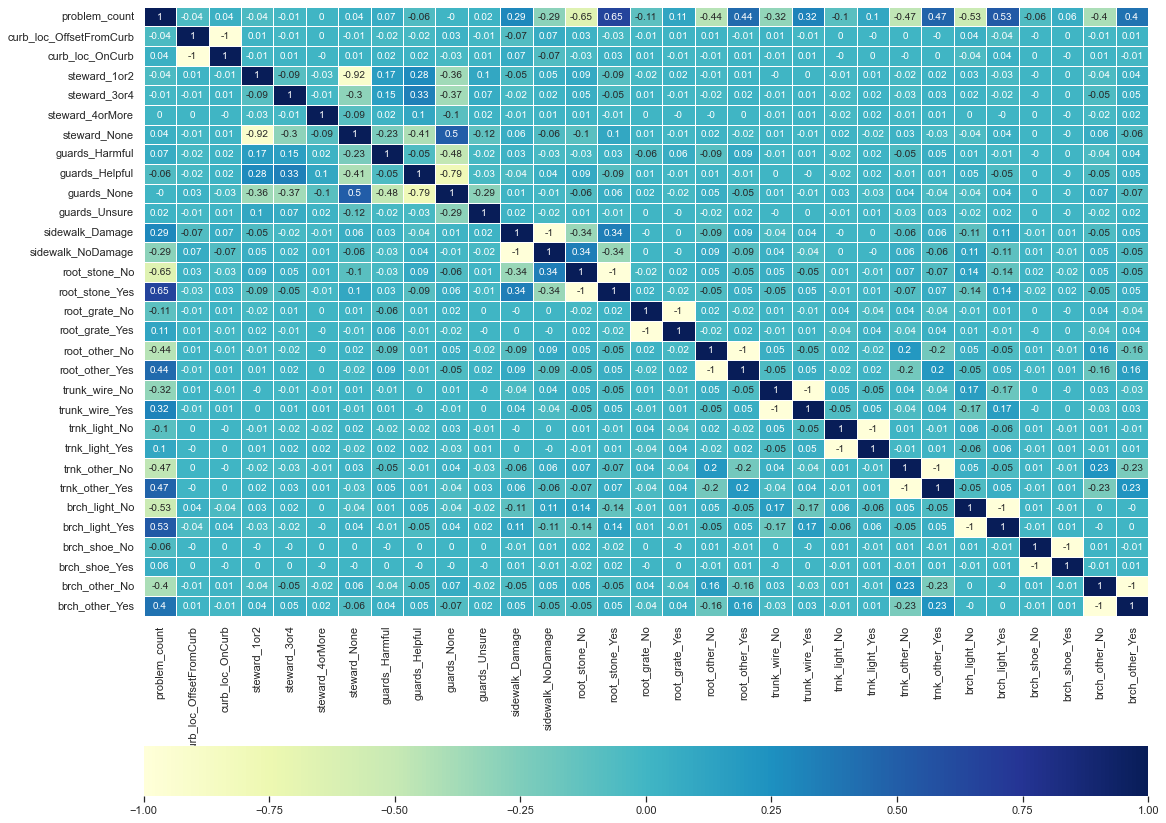

In [86]:
# remove target variable, health
tree_corr = data.drop(columns='health')

plt.figure(figsize=(18, 16))
sns.heatmap(tree_corr.corr().round(2), center=0, cmap='YlGnBu', linewidths=.5, annot=True, cbar_kws={'orientation': 'horizontal'})
plt.show()